# <center> Automatic Feature Selection </center>

- <b><span style='color:green'>to reduce dimensionality<span></b>
- common methods: univariate statistics, model-based selection, iterative selection

### 1. Univariate Statistics

- determines the relationship between each feature and output (target)
- only the features with highest confidence are selected
- <b><span style='color:blue'>SelectKBest</span></b> - selecting K number of features
- <b><span style='color:blue'>SelectPercentile</span></b> - selection is made based on a percentage of the original features

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.linear_model import LogisticRegression
%matplotlib inline

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print('X_train.shape is: {}'.format(X_train.shape))
print('X_train_selected.shape is: {}'.format(X_train_selected.shape))

X_train.shape is: (284, 80)
X_train_selected.shape is: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


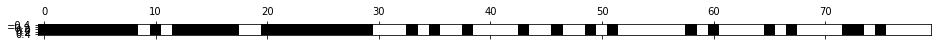

In [16]:
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [17]:
X_test_selected = select.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('The score of Logistic Regression on all the features: {:.4f}'.format(logreg.score(X_test, y_test)))

logreg.fit(X_train_selected, y_train)
print('The score of Logistic Regression on the selected features: {:.4f}'.format(logreg.score(X_test_selected, y_test)))

The score of Logistic Regression on all the features: 0.930
The score of Logistic Regression on the selected features: 0.940
